In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Make the dataset (synthetic data. doing this so we can visualize it and compare against the true function)
N = 1000
# uniformly distributed between (-3, +3)
X = np.random.random((N, 2)) * 6 - 3
# y = cos(2 * first feature) + cos(3 * second feature) (gives us simple non-linear function)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

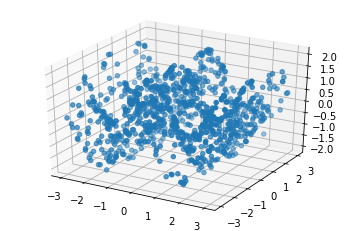

In [4]:
# Plot it (run on your own computer to see separate window where you can rotate the image n stuff to see data better)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [5]:
# Since regression, no activation needed at the end (final layer)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [ ]:
opt = tf.keras.optimizers.Adam(.01) # learning rate = .01
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

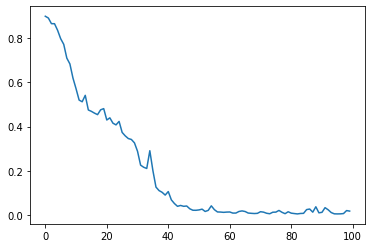

In [9]:
# Plot the loss (if it doesnt look like it converges, adjust hyperparameters)
plt.plot(r.history['loss'], label='loss')

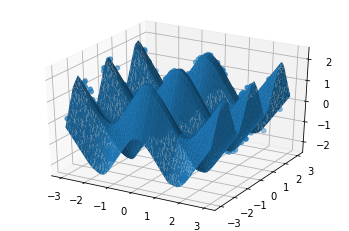

In [17]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line) # do cross product between each set of points, to get first and second axes (xx, yy)
# need an Nx2 array, so flatten both, stack them, and transpose result
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=.2, antialiased=True)
plt.show()

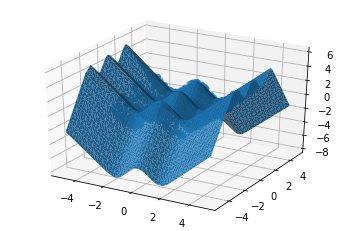

In [19]:
# Can it extrapolate? (i.e. continue onto infinity?)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
line = np.linspace(-5, 5, 50) # only line we changed
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=.2, antialiased=True)
plt.show()
# no, it just keeps going that direction at the edges
# because the ANN doesnt use a periodic activation function